# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 719 (delta 32), reused 48 (delta 32), pack-reused 666
Receiving objects: 100% (719/719), 319.77 KiB | 16.83 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_image

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
Completed Image ====> 2.2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit-640x354.jpg
Completed Image ====> 3.sonata-hero-option1-764a5360-edit-640x354.jpg
Image URL: https://www.cnet.com/a/img/CSTqzAl5wJ57HHyASLD-a0vS2O0=/940x528/2021/04/05/9e065d90-51f2-46c5-bd3a-416fd4983c1a/elan

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [ ]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [ ]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 4. Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
H = 150
W = 150
EPOCH=100
home_path = './'

In [ ]:

#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

def normal_generator():
  #we should scale images to get better performance
  train_datagen = ImageDataGenerator(rescale=1/255)
  test_datagen = ImageDataGenerator(rescale=1/255)
  train_generator = train_datagen.flow_from_directory(
                  directory=home_path + r'/train/',
                  target_size=(H, W), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=batch_size, # number of images to extract from folder for every batch
                  seed=2020 # to make the result reproducible
                  )
  validation_generator = test_datagen.flow_from_directory(
                  directory=home_path + r'/test/',
                  target_size=(H, W), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=batch_size, # number of images to extract from folder for every batch
                  seed=2020 # to make the result reproducible
                  )
  
  return train_generator, validation_generator


def augment_generator():
  #we should scale images to get better performance
  train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=10, # rotation
      width_shift_range=0.2, # horizontal shift
      height_shift_range=0.2, # vertical shift
      zoom_range=0.2, # zoom
      horizontal_flip=True, # horizontal flip
      brightness_range=[0.2,1.2] # brightness
  )

  test_datagen = ImageDataGenerator(rescale=1/255)
  train_generator = train_datagen.flow_from_directory(
                  directory=home_path + r'/train/',
                  target_size=(H, W), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=batch_size, # number of images to extract from folder for every batch
                  seed=2020 # to make the result reproducible
                  )
  validation_generator = test_datagen.flow_from_directory(
                  directory=home_path + r'/test/',
                  target_size=(H, W), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=batch_size, # number of images to extract from folder for every batch
                  seed=2020 # to make the result reproducible
                  )
  
  return train_generator, validation_generator


In [ ]:
train_generator, test_generator = normal_generator()
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

Found 219 images belonging to 5 classes.
Found 59 images belonging to 5 classes.
(16, 150, 150, 3)
(16, 5)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


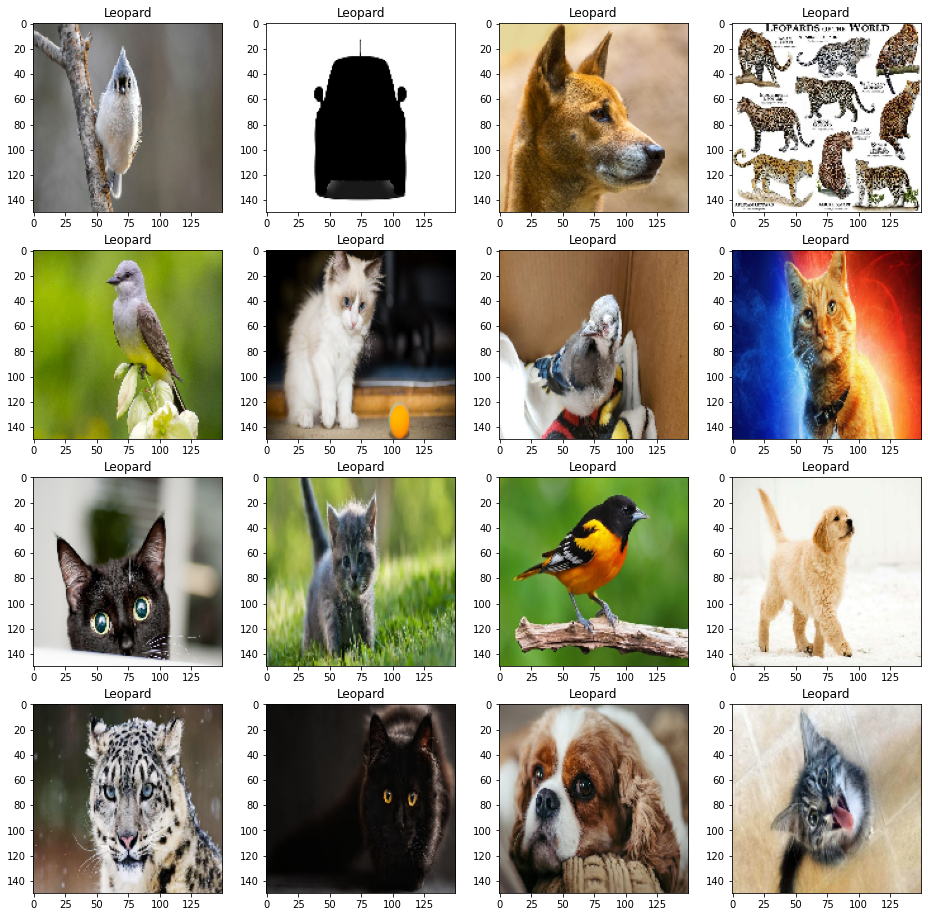

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

def plot_history(history):
  with plt.style.context('ggplot'): #ggplot is good for visualization
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].legend()

    ax[1].plot(history.history['val_accuracy'], label='val_acc')
    ax[1].plot(history.history['accuracy'], label='acc')
    ax[1].legend()



def build_and_test_and_plot_model(loss_func, optimizer_func, train_data, test_data, metrics, dropout_rate=0):

  #model layers
  with tf.device('/device:GPU:0'):
    model = tf.keras.models.Sequential()

    model.add(
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", 
                              input_shape=(H, W, 3)) #since it's hard to get the shape from image directory iterator so we hardcoded
    )

    model.add(
        tf.keras.layers.MaxPool2D(pool_size=(2, 2))
    )

    model.add(
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu")
    )

    model.add(
        tf.keras.layers.MaxPool2D(pool_size=(2, 2))
    )

    model.add(
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu")
    )

    model.add(
        tf.keras.layers.MaxPool2D(pool_size=(2, 2))
    )

    model.add(
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu")
    )

    model.add(
        tf.keras.layers.Flatten()
    )

    model.add(
        tf.keras.layers.Dense(units=64, activation="relu")
    )

    model.add(
        tf.keras.layers.Dropout(rate=dropout_rate)
    )

    model.add(
        tf.keras.layers.Dense(5) #we have 5 diffrent class
    )

    model.add(
        tf.keras.layers.Activation("softmax")
    )

    model.summary()




    model.compile(loss=loss_func, optimizer=optimizer_func, metrics=metrics)
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=EPOCH,
        verbose=0
    )

    plot_history(history)

    #https://stackoverflow.com/questions/67303001/plot-confusion-matrix-with-keras-data-generator-using-sklearn
    print("Predict")
    Y_pred = model.predict(test_data, batch_size)
    y_pred = np.argmax(Y_pred, axis=1)

    print("Result of evalution for test dataset")
    model.evaluate(test_data, batch_size=batch_size)


    return model, history, y_pred

Found GPU at: /device:GPU:0


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

#report and confusion matrix

#https://stackoverflow.com/questions/67303001/plot-confusion-matrix-with-keras-data-generator-using-sklearn
#https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1



def draw_matrix(model, test_generator, train_generator, y_pred, classes):
  # cm = confusion_matrix(classes, y_pred)
  # plot_confusion_matrix(model1, X, y , normalize='true', xticks_rotation = 'vertical', confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))

  X,y = test_generator.next()
  y = np.argmax(y, axis=1)

  class newmodel(MLPClassifier):
    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y = self.model.predict(X)
        return np.argmax(y,axis=1)

  model1 = newmodel(model)
  plot_confusion_matrix(model1, X, y , normalize='true', xticks_rotation = 'vertical', display_labels = list(train_generator.class_indices.keys()))


def report(y_pred, classes):
  print(classification_report(classes, y_pred))

def report_and_draw_matrix(model, test_gen, train_gen, y_pred):
  draw_matrix(model, test_gen, train_gen, y_pred, test_gen.classes)
  report(y_pred, test_gen.classes)
  

# Part A: build and train model without using data augmentation

In [ ]:
train_d, test_d = normal_generator()

Found 219 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 64)      

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Predict
Result of evalution for test dataset
4/4 [==============================] - 1s 151ms/step - loss: 1.3875 - accuracy: 0.3898


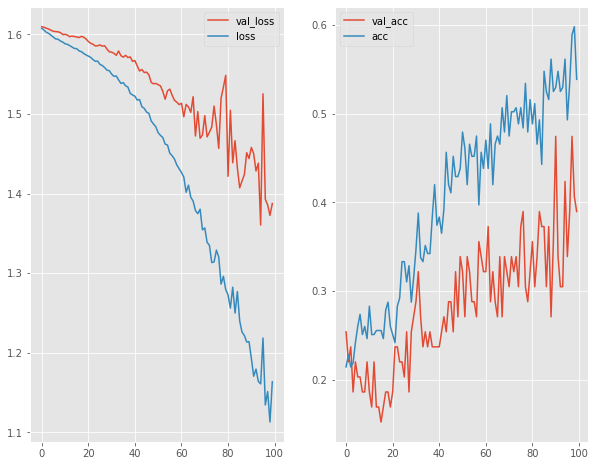

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model, history, y_pred = build_and_test_and_plot_model(
    "categorical_crossentropy",
    opt,
    train_d,
    test_d,
    ["accuracy"],
    dropout_rate=0
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       1.00      0.09      0.17        11
           2       0.20      0.18      0.19        11
           3       0.21      0.36      0.27        11
           4       0.27      0.23      0.25        13

    accuracy                           0.25        59
   macro avg       0.39      0.25      0.24        59
weighted avg       0.38      0.25      0.24        59



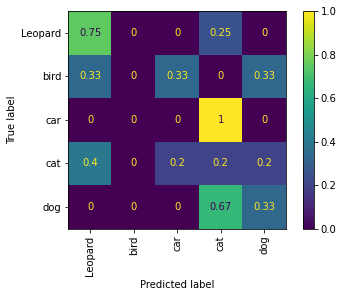

In [ ]:
report_and_draw_matrix(model, test_d, train_d, y_pred)

# Part B: train model using data augmentation

In [ ]:
train_d, test_d = augment_generator()

Found 219 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 64)     

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Predict
Result of evalution for test dataset
4/4 [==============================] - 1s 151ms/step - loss: 1.5674 - accuracy: 0.2373


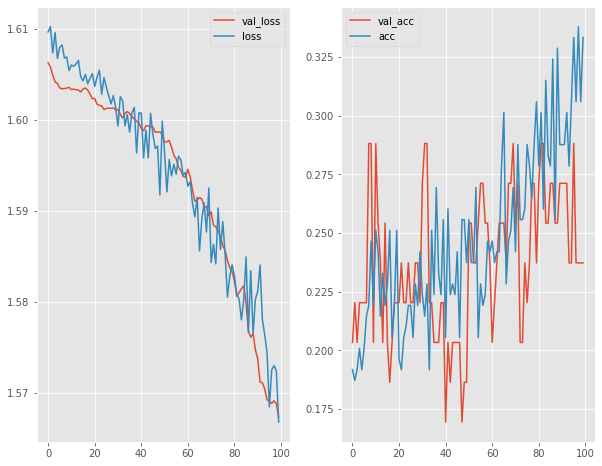

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model, history, y_pred = build_and_test_and_plot_model(
    "categorical_crossentropy",
    opt,
    train_d,
    test_d,
    ["accuracy"],
    dropout_rate=0
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.17      0.73      0.28        11
           4       0.20      0.15      0.17        13

    accuracy                           0.17        59
   macro avg       0.07      0.18      0.09        59
weighted avg       0.08      0.17      0.09        59



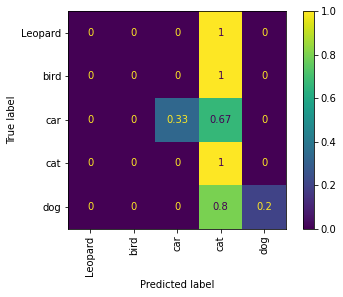

In [ ]:
report_and_draw_matrix(model, test_d, train_d, y_pred)

# Part C: build and train model with dropout

In [ ]:
train_d, test_d = augment_generator()

Found 219 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 17, 17, 64)     

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Predict
Result of evalution for test dataset
4/4 [==============================] - 1s 147ms/step - loss: 1.5583 - accuracy: 0.2712


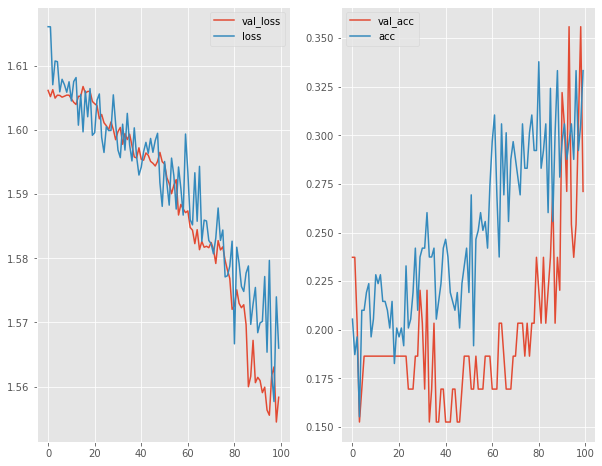

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model, history, y_pred = build_and_test_and_plot_model(
    "categorical_crossentropy",
    opt,
    train_d,
    test_d,
    ["accuracy"],
    dropout_rate=0.1
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.12      0.36      0.19        11
           4       0.19      0.31      0.24        13

    accuracy                           0.14        59
   macro avg       0.06      0.13      0.08        59
weighted avg       0.07      0.14      0.09        59



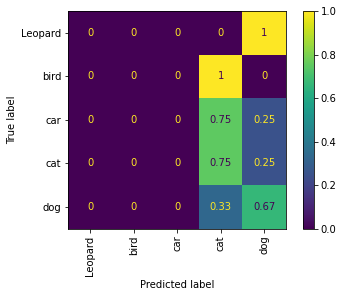

In [ ]:
report_and_draw_matrix(model, test_d, train_d, y_pred)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 17, 17, 64)     

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Predict
Result of evalution for test dataset
4/4 [==============================] - 1s 150ms/step - loss: 1.5737 - accuracy: 0.2203


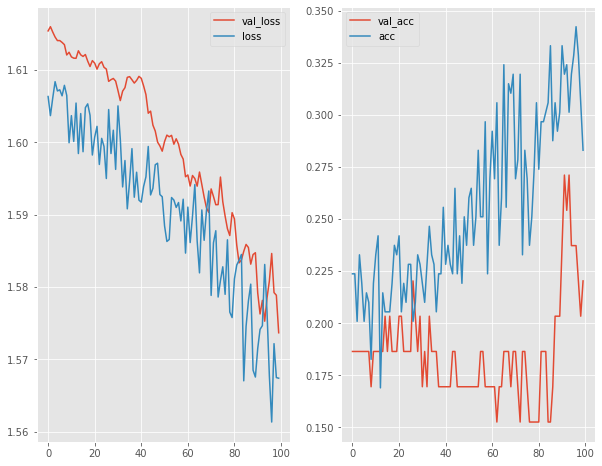

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model, history, y_pred = build_and_test_and_plot_model(
    "categorical_crossentropy",
    opt,
    train_d,
    test_d,
    ["accuracy"],
    dropout_rate=0.35
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.19      0.45      0.27        11
           4       0.24      0.46      0.32        13

    accuracy                           0.19        59
   macro avg       0.09      0.18      0.12        59
weighted avg       0.09      0.19      0.12        59



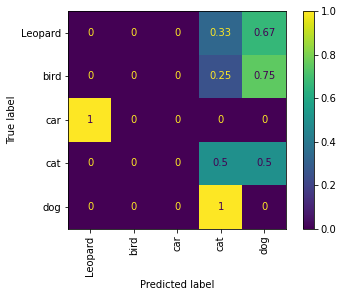

In [ ]:
report_and_draw_matrix(model, test_d, train_d, y_pred)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 17, 17, 64)     

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Predict
Result of evalution for test dataset
4/4 [==============================] - 1s 134ms/step - loss: 1.5182 - accuracy: 0.2881


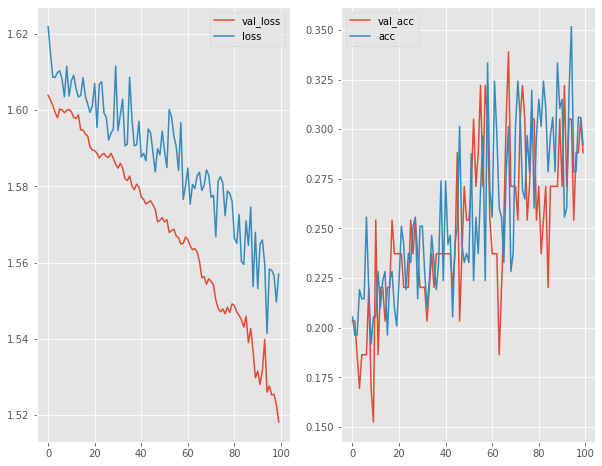

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model, history, y_pred = build_and_test_and_plot_model(
    "categorical_crossentropy",
    opt,
    train_d,
    test_d,
    ["accuracy"],
    dropout_rate=0.6
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.00      0.00      0.00        11
           2       0.11      0.09      0.10        11
           3       0.29      0.18      0.22        11
           4       0.12      0.38      0.19        13

    accuracy                           0.15        59
   macro avg       0.20      0.15      0.13        59
weighted avg       0.21      0.15      0.13        59



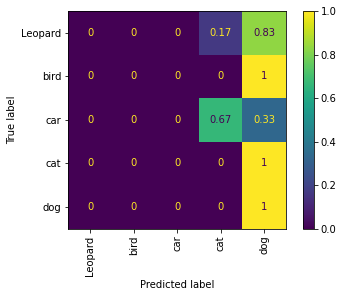

In [ ]:
report_and_draw_matrix(model, test_d, train_d, y_pred)